# TASK-1

# Data Preprocessing for the datasets

In [2]:
import pandas as pd

fraud_df=pd.read_csv('../data/raw/Fraud_Data.csv')
credit_df=pd.read_csv("../data/raw/creditcard.csv")
ip_df=pd.read_csv("../data/raw/IpAddress_to_Country.csv")

# --- Fraud_Data.csv ---
print("Fraud_Data.csv — Shape:", fraud_df.shape)
print("\n Data Types:\n", fraud_df.dtypes)
print("\n Missing Values:\n", fraud_df.isnull().sum())
print("\n Preview:\n", fraud_df.head())

# --- creditcard.csv ---
print("\n\n creditcard.csv — Shape:", credit_df.shape)
print("\n Data Types:\n", credit_df.dtypes)
print("\n Missing Values:\n", credit_df.isnull().sum())
print("\n Preview:\n", credit_df.head())

# --- IpAddress_to_Country.csv ---
print("\n\n IpAddress_to_Country.csv — Shape:", ip_df.shape)
print("\n Data Types:\n", ip_df.dtypes)
print("\n Missing Values:\n", ip_df.isnull().sum())
print("\n Preview:\n", ip_df.head())

Fraud_Data.csv — Shape: (151112, 11)

 Data Types:
 user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

 Missing Values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

 Preview:
    user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 0

| Dataset                    | Missing Values | Action Needed |
| -------------------------- | -------------- | ------------- |
| `Fraud_Data.csv`           | ✅ None         | ✅ Skip        |
| `creditcard.csv`           | ✅ None         | ✅ Skip        |
| `IpAddress_to_Country.csv` | ✅ None         | ✅ Skip        |


## Next Step: Data Cleaning
This includes:

Removing duplicates

Fixing data types (e.g., timestamps, IP addresses)

In [3]:
# Check for duplicates in each dataset
print("Duplicates in Fraud_Data.csv:", fraud_df.duplicated().sum())
print("Duplicates in creditcard.csv:", credit_df.duplicated().sum())
print("Duplicates in IpAddress_to_Country.csv:", ip_df.duplicated().sum())

Duplicates in Fraud_Data.csv: 0
Duplicates in creditcard.csv: 1081
Duplicates in IpAddress_to_Country.csv: 0


In [4]:
fraud_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)
ip_df.drop_duplicates(inplace=True)

In [5]:
# Convert time columns in Fraud_Data to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert lower_bound_ip_address to integer (from float)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('int64')

# EDA (Exploratory data Analysis)

## 🔍 EDA for Fraud_Data.csv


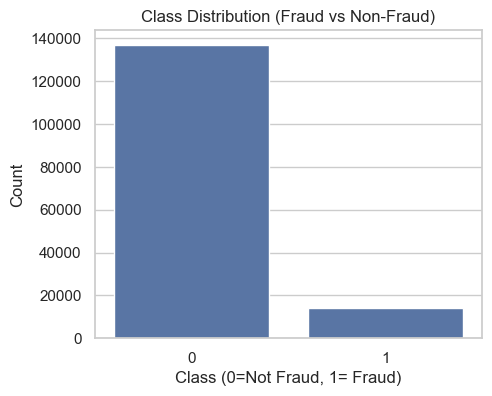

In [6]:
# Univariate plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot class Distribution

plt.figure(figsize=(5,4))
sns.countplot(x='class', data=fraud_df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class (0=Not Fraud, 1= Fraud)')
plt.ylabel('Count')
plt.show()

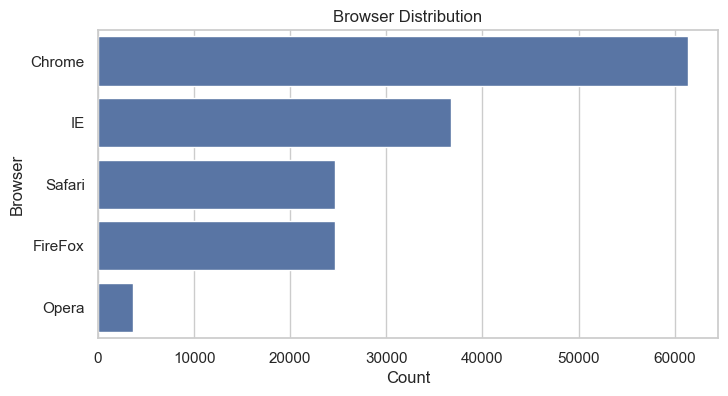

In [7]:
# Plot categorical feature: browser
plt.figure(figsize=(8,4))
sns.countplot(y='browser', data=fraud_df, order=fraud_df['browser'].value_counts().index)
plt.title('Browser Distribution')
plt.xlabel('Count')
plt.ylabel('Browser')
plt.show()

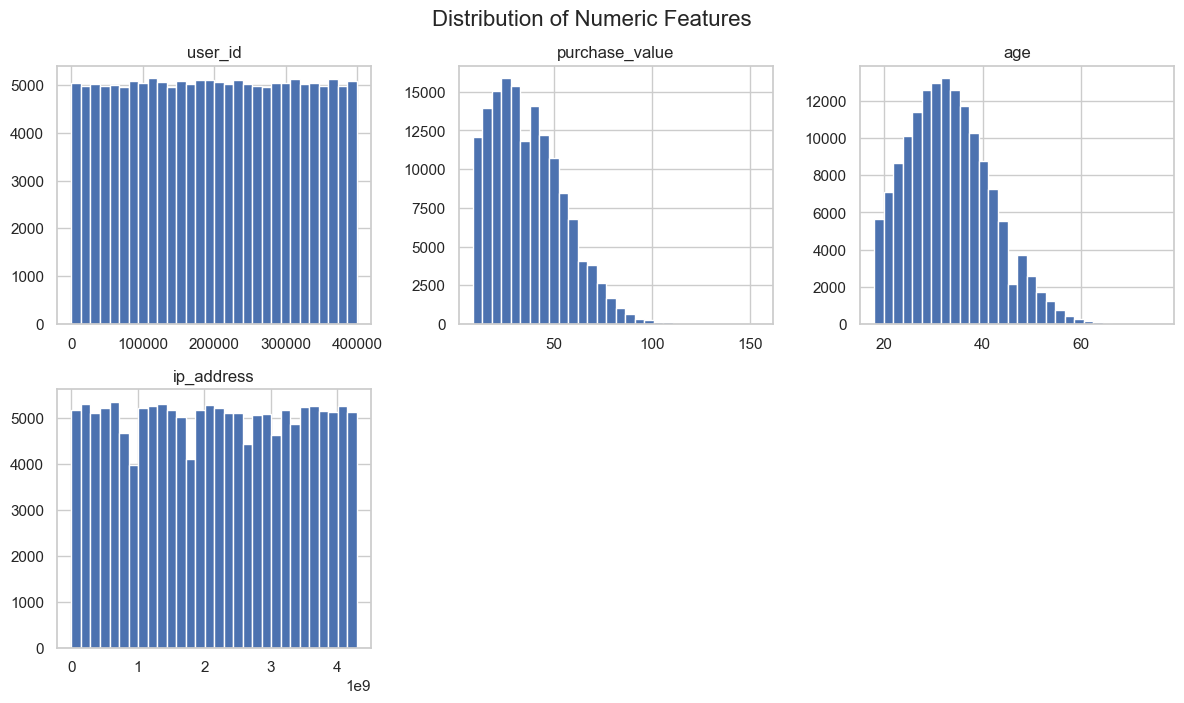

In [8]:
# Histograms for numeric columns
numeric_cols = fraud_df.select_dtypes(include=['float64', 'int64']).columns.drop('class')

fraud_df[numeric_cols].hist(bins=30, figsize=(12,10), layout=(3,3))
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

### Bivariate analysis

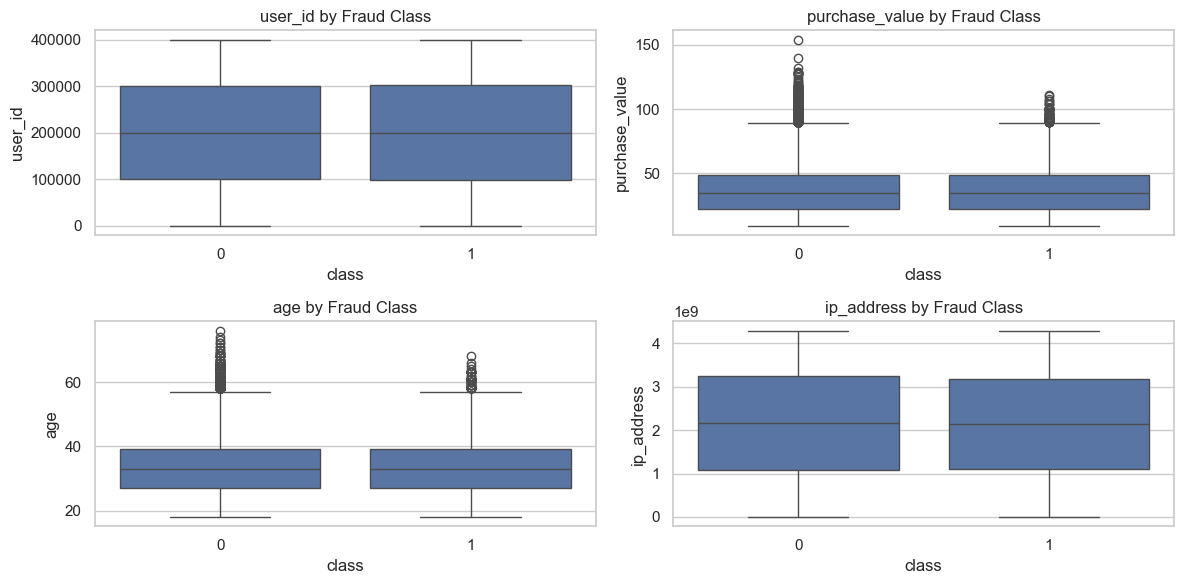

In [9]:
# Boxplots: numerical features vs. fraud class
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:4], 1):  # first 4 numerical columns
    plt.subplot(2, 2, i)
    sns.boxplot(data=fraud_df, x='class', y=col)
    plt.title(f'{col} by Fraud Class')
plt.tight_layout()
plt.show()


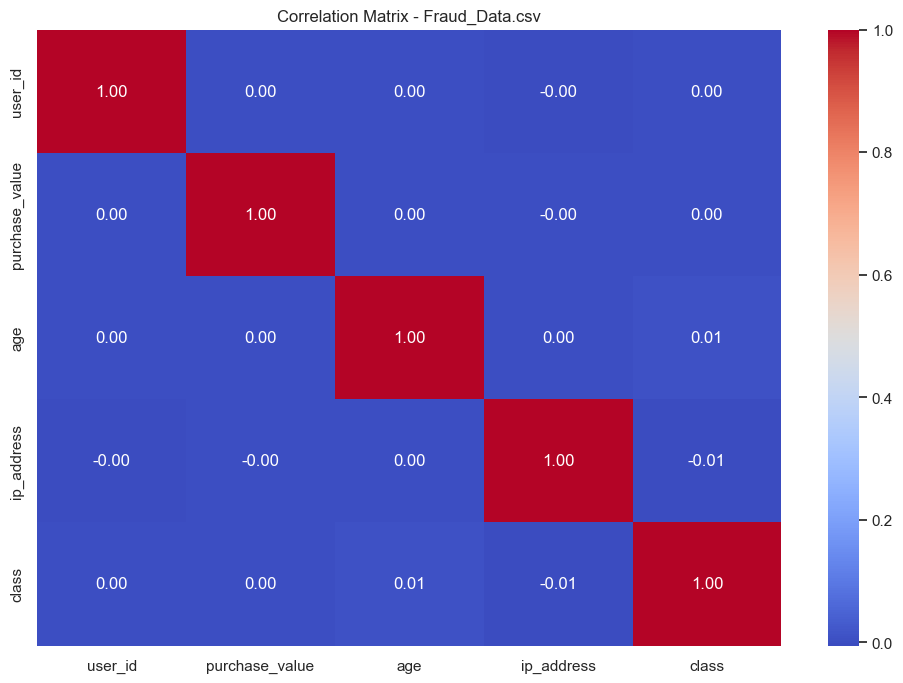

In [10]:
# Correlation Matrix

# Select only numeric columns
numeric_cols = fraud_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Fraud_Data.csv")
plt.show()

# 📊 EDA for creditcard.csv


C:\Users\arsem\AppData\Local\Temp\ipykernel_24032\371205364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit_df, x='Class', palette='Set2')


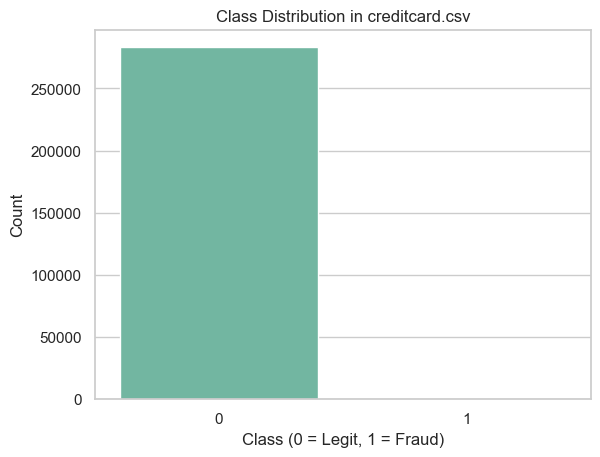

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
# Class distribution
sns.countplot(data=credit_df, x='Class', palette='Set2')
plt.title("Class Distribution in creditcard.csv")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Summary statistics
display(credit_df.describe())

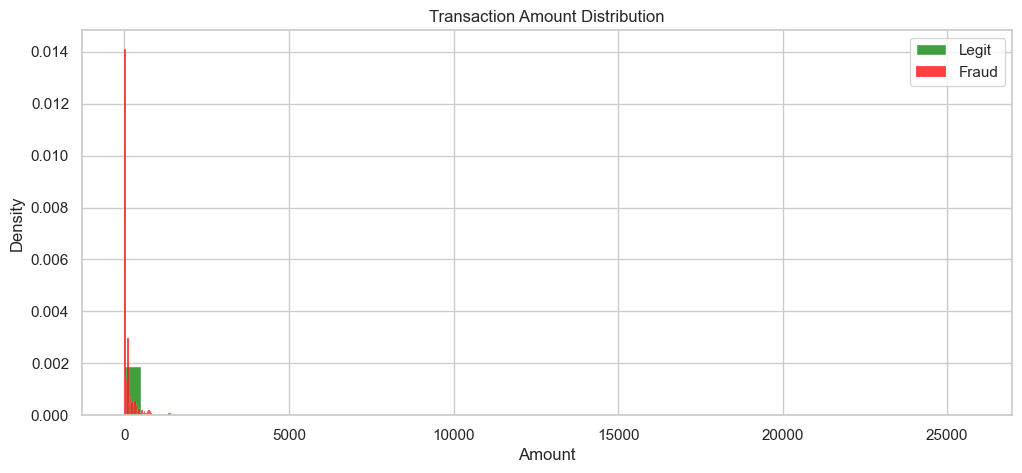

In [12]:
# Cell: Amount Distribution (Fraud vs Legit)

plt.figure(figsize=(12, 5))
sns.histplot(credit_df[credit_df['Class'] == 0]['Amount'], bins=50, color='green', label='Legit', stat='density')
sns.histplot(credit_df[credit_df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', stat='density')
plt.title("Transaction Amount Distribution")
plt.legend()
plt.xlabel("Amount")
plt.show()

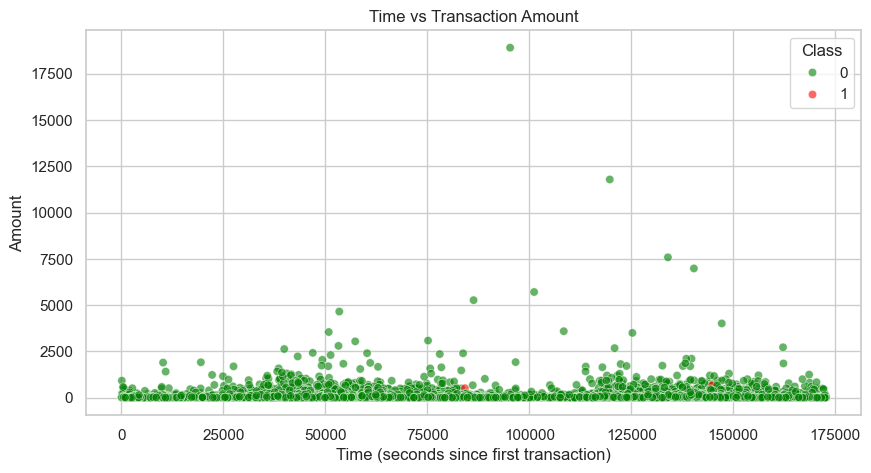

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=credit_df.sample(10000), x='Time', y='Amount', hue='Class', palette={0:'green', 1:'red'}, alpha=0.6)
plt.title("Time vs Transaction Amount")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Amount")
plt.show()

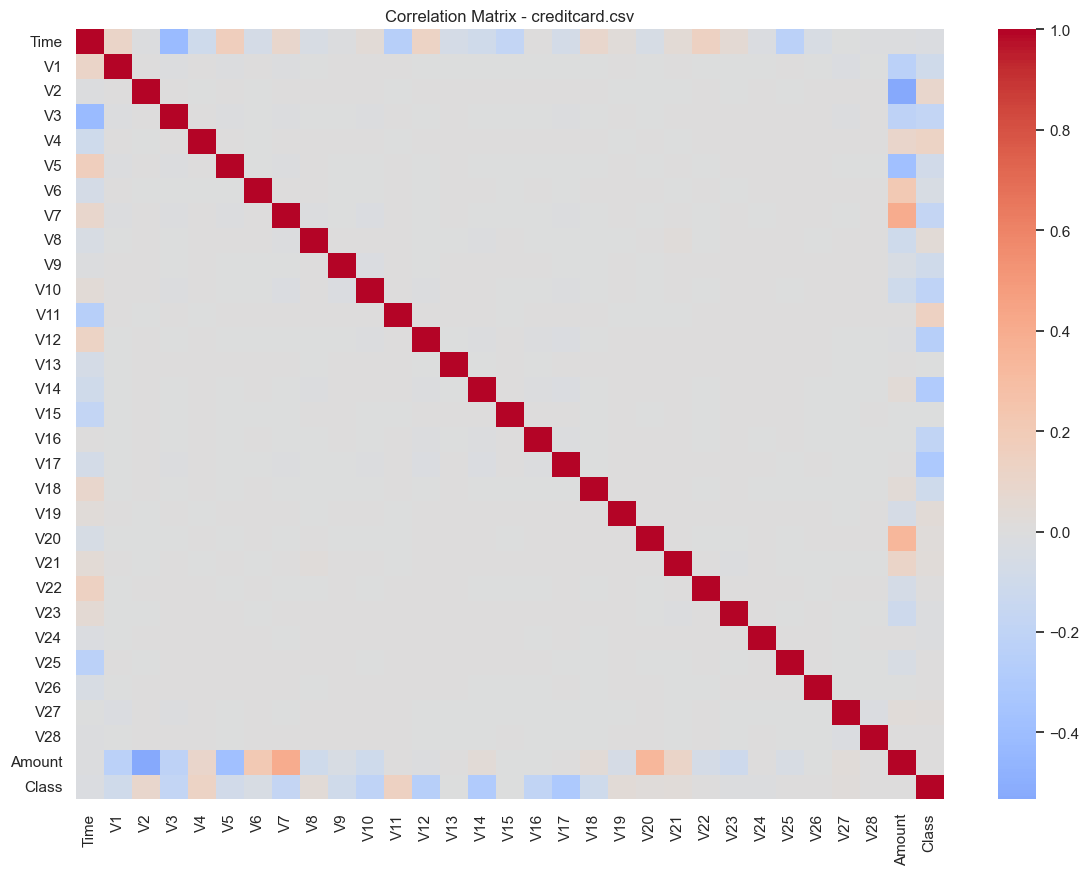

In [14]:
# correlation matrix

plt.figure(figsize=(14, 10))
corr = credit_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=True, annot=False)
plt.title("Correlation Matrix - creditcard.csv")
plt.show()


# 📦 EDA for IpAddress_to_Country.csv


## 🧪 Cell: Quick Summary and Top Countries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


None

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


Number of unique countries: 235


C:\Users\arsem\AppData\Local\Temp\ipykernel_24032\486735674.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


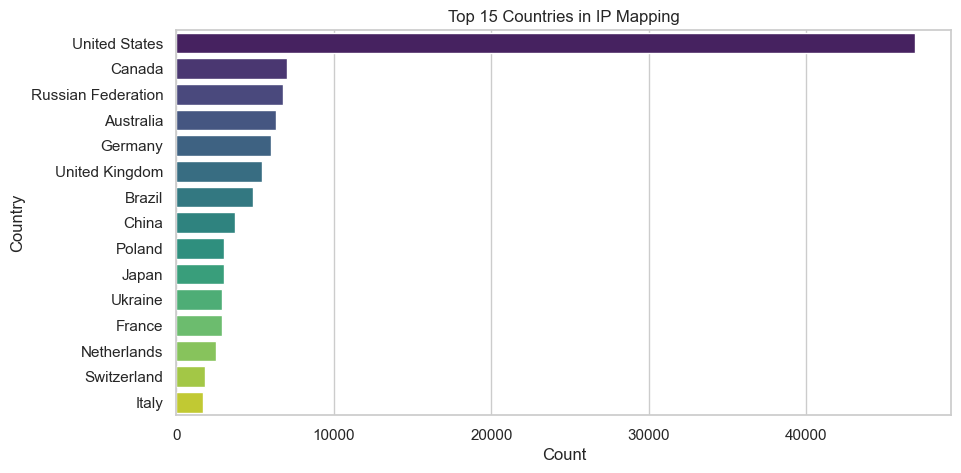

In [15]:
display(ip_df.info())
display(ip_df.head())

# Number of unique countries
print("Number of unique countries:", ip_df['country'].nunique())

# Top countries
top_countries = ip_df['country'].value_counts().head(15)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 15 Countries in IP Mapping")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

In [18]:
# Check min/max of IP ranges
print("Min IP (lower_bound_ip_address):", ip_df['lower_bound_ip_address'].min())
print("Max IP (upper_bound_ip_address):", ip_df['upper_bound_ip_address'].max())

# Check if any rows have invalid ranges
invalid_ranges = ip_df[ip_df['upper_bound_ip_address'] < ip_df['lower_bound_ip_address']]
print(f"Rows with invalid IP ranges: {len(invalid_ranges)}")
display(invalid_ranges.head())


Min IP (lower_bound_ip_address): 16777216
Max IP (upper_bound_ip_address): 3758096383
Rows with invalid IP ranges: 0


,lower_bound_ip_address,upper_bound_ip_address,country


# Merging Datasets for Geolocation Analysis

## Convert the IP addresses in Fraud_Data.csv to integer format.

## Use that integer to match the appropriate IP range in IpAddress_to_Country.csv.

## Add a new column: country to fraud_df.



In [19]:
import ipaddress

# Function to convert IP string to integer
def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except:
        return None  # return None if conversion fails

# Apply to fraud_df
fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)

# Check a few converted values
fraud_df[['ip_address', 'ip_int']].head()


,ip_address,ip_int
0,7.327584e+08,None
1,3.503114e+08,None
2,2.621474e+09,None
3,3.840542e+09,None
4,4.155831e+08,None


In [20]:
def map_country(ip_val, ip_df):
    match = ip_df[(ip_df['lower_bound_ip_address'] <= ip_val) & 
                  (ip_df['upper_bound_ip_address'] >= ip_val)]
    if not match.empty:
        return match.iloc[0]['country']
    return 'Unknown'

# Apply with progress bar
from tqdm import tqdm
tqdm.pandas()

fraud_df['country'] = fraud_df['ip_address'].progress_apply(lambda x: map_country(x, ip_df))


100%|██████████| 151112/151112 [01:19<00:00, 1911.76it/s]


In [21]:
fraud_df[['ip_address', 'country']].head()


,ip_address,country
0,7.327584e+08,Japan
1,3.503114e+08,United States
2,2.621474e+09,United States
3,3.840542e+09,Unknown
4,4.155831e+08,United States


In [24]:
fraud_df.columns


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_int', 'country'],
      dtype='object')

In [25]:
fraud_df['class'].value_counts(normalize=True)


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

# Feature Engineering for Fraud_Data.csv

In [26]:
# Frequency of transactions per user
fraud_df['transaction_count'] = fraud_df.groupby('user_id')['user_id'].transform('count')

# Frequency of transactions per device
fraud_df['device_transaction_count'] = fraud_df.groupby('device_id')['device_id'].transform('count')


In [27]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


In [28]:
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour


In [29]:
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek


In [30]:
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()


In [31]:
fraud_df[['user_id', 'device_id', 'transaction_count', 'device_transaction_count', 
          'hour_of_day', 'day_of_week', 'time_since_signup']].head()

,user_id,device_id,transaction_count,device_transaction_count,hour_of_day,day_of_week,time_since_signup
0,22058,QVPSPJUOCKZAR,1,1,2,5,4506682.0
1,333320,EOGFQPIZPYXFZ,1,1,1,0,17944.0
2,1359,YSSKYOSJHPPLJ,1,12,18,3,1.0
3,150084,ATGTXKYKUDUQN,1,1,13,0,492085.0
4,221365,NAUITBZFJKHWW,1,1,18,2,4361461.0
